In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.optim import Adam
import numpy as np
from torch.utils.data import TensorDataset , DataLoader
from tqdm import tqdm
import pandas as pd

In [6]:
df = pd.read_csv("data.csv")
x = df.drop("Y" , axis = 1).values.reshape(-1,1)
y = df.drop("X" , axis = 1).values.reshape(-1,1)

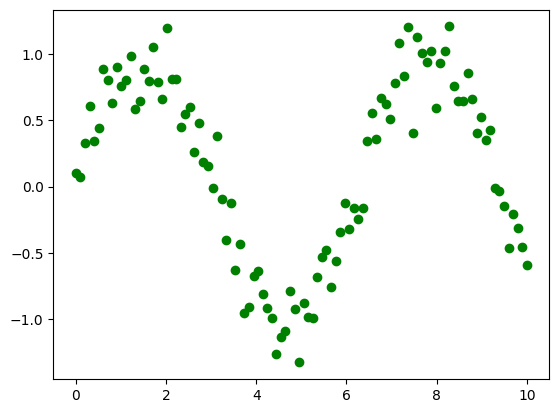

In [7]:
plt.scatter(x,y , color = "green")
plt.show()

In [8]:
x = torch.tensor(x , dtype = torch.float32)
y = torch.tensor(y , dtype = torch.float32)

In [9]:
class non_linear_regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1,64)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(64,64)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(64,1)
    def forward(self , x):
        y1 = self.linear1(x)
        y2 = self.relu1(y1)
        y3 = self.linear2(y2)
        y4 = self.relu2(y3)
        y5 = self.linear3(y4)
        return y5
    
model = non_linear_regression()
model

non_linear_regression(
  (linear1): Linear(in_features=1, out_features=64, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=64, out_features=1, bias=True)
)

In [10]:
y_hat = model(x)

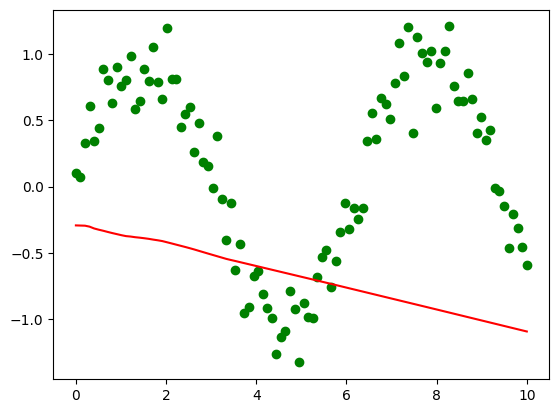

In [11]:
plt.scatter(x,y , color = "green")
plt.plot(x,y_hat.detach().numpy() , color = "red")
plt.show()

In [12]:
set_data = TensorDataset(x,y)
dataloader = DataLoader(set_data , batch_size = 32)

In [13]:
loss_fu = nn.MSELoss()
loss_fu

MSELoss()

In [14]:
opt = Adam(model.parameters() , lr = 0.01)
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [15]:
epochs = 2000
for i in tqdm(range(epochs)):
    for inputs , outputs in dataloader:
        opt.zero_grad()
        y_hat = model(inputs)
        loss = loss_fu(y_hat , outputs)
        loss.backward()
        opt.step()

100%|██████████| 2000/2000 [00:07<00:00, 268.45it/s]


In [16]:
model.eval()
with torch.no_grad():
    predicted = model(x).numpy()

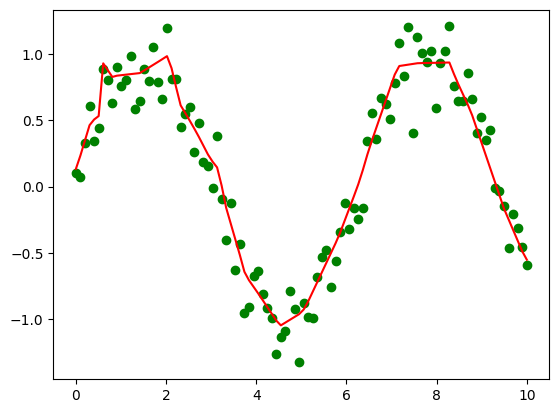

In [17]:
plt.scatter(x,y , color = "green")
plt.plot(x , predicted , color = "red")
plt.show()

In [24]:
temp = np.linspace(-10 , 10 , 100)
temp = temp.reshape(-1,1)
temp = torch.tensor(temp , dtype = torch.float32)

In [23]:
pred = model(temp)

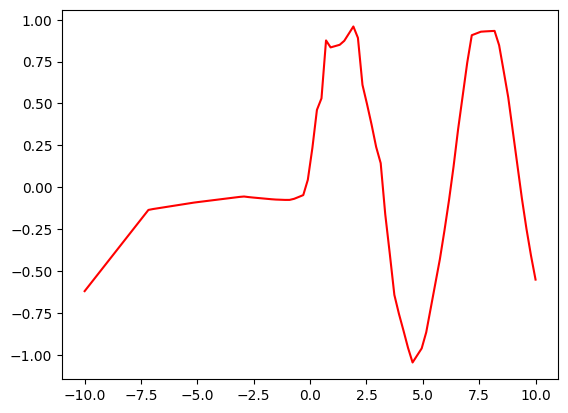

In [26]:
plt.plot(temp , pred.detach().numpy() , color = "red")